In [76]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from tensorflow.keras import Sequential,layers,optimizers
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [77]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('player_stats.csv',encoding="utf-8")

In [78]:
data_copy = data.copy()


In [79]:
whitespace_df = data_copy.applymap(lambda x: x.isspace() if isinstance(x, str) else False)
whitespace_df.iloc[::1050]

,Unnamed: 0,match_id,game_id,team,score_team,opponent,score_opp,win_lose,map,map_pick,player_id,player,agent,rating,acs,kill,death,assist,kast%,adr,hs%,fk,fd
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1050,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,True,True,False
2100,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3150,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
data_copy = data_copy.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
baris_dengan_null = data_copy[data_copy.isna().any(axis=1)]
baris_dengan_null

,Unnamed: 0,match_id,game_id,team,score_team,opponent,score_opp,win_lose,map,map_pick,player_id,player,agent,rating,acs,kill,death,assist,kast%,adr,hs%,fk,fd
1050,1050,53713,119677,ZETA,13,TS,15,opponent win,Haven,opponent pick,999,Laz,sova,NaN,NaN,25,20,16,NaN,NaN,NaN,NaN,NaN
1051,1051,53713,119677,ZETA,13,TS,15,opponent win,Haven,opponent pick,1000,crow,breach,NaN,NaN,16,20,9,NaN,NaN,NaN,NaN,NaN
1052,1052,53713,119677,ZETA,13,TS,15,opponent win,Haven,opponent pick,424,Dep,jett,NaN,NaN,17,23,8,NaN,NaN,NaN,NaN,NaN
1053,1053,53713,119677,ZETA,13,TS,15,opponent win,Haven,opponent pick,6668,SugarZ3ro,omen,NaN,NaN,17,20,10,NaN,NaN,NaN,NaN,NaN
1054,1054,53713,119677,ZETA,13,TS,15,opponent win,Haven,opponent pick,1395,TENNN,killjoy,NaN,NaN,20,22,2,NaN,NaN,NaN,NaN,NaN
1055,1055,53713,119677,TS,15,ZETA,13,team win,Haven,team pick,2333,BORKUM,omen,NaN,NaN,12,21,17,NaN,NaN,NaN,NaN,NaN
1056,1056,53713,119677,TS,15,ZETA,13,team win,Haven,team pick,2334,JessieVash,sova,NaN,NaN,24,15,12,NaN,NaN,NaN,NaN,NaN
1057,1057,53713,119677,TS,15,ZETA,13,team win,Haven,team pick,2679,DubsteP,killjoy,NaN,NaN,22,17,2,NaN,NaN,NaN,NaN,NaN
1058,1058,53713,119677,TS,15,ZETA,13,team win,Haven,team pick,7405,Jremy,raze,NaN,NaN,21,21,4,NaN,NaN,NaN,NaN,NaN
1059,1059,53713,119677,TS,15,ZETA,13,team win,Haven,team pick,8504,invy,breach,NaN,NaN,26,21,8,NaN,NaN,NaN,NaN,NaN


In [81]:
nilai_na =data_copy.isna().sum()
kolom_dengan_data_null = data_copy.columns[data_copy.any()].tolist()
for kolom in kolom_dengan_data_null:
    if nilai_na[kolom] > 0:
        tipe_data_kolom = data_copy[kolom].dtype
        print(tipe_data_kolom)
        if tipe_data_kolom == 'int64':
            median = data_copy[kolom].median()
            data_copy[kolom].fillna(median, inplace=True)
        elif tipe_data_kolom == 'float64':
            mean = data_copy[kolom].mean()
            data_copy[kolom].fillna(mean, inplace=True)
        elif tipe_data_kolom == 'object':
            modus = data_copy[kolom].mode()[0]
            data_copy[kolom].fillna(modus, inplace=True)

object
object
object
object
object
object
object


In [82]:
data_copy["kast%"] =data_copy['kast%'].str.rstrip('%').astype(float) /100
data_copy['hs%'] = data_copy['hs%'].str.rstrip('%').astype(float) /100
data_copy['acs'] = pd.to_numeric(data_copy['acs'], errors='coerce', downcast='integer')

In [83]:
LabelEncoder = LabelEncoder()
Ordinalencoding = OrdinalEncoder()
data_copy["win_lose"] = LabelEncoder.fit_transform(data_copy[["win_lose"]])
data_copy["win_lose"] = LabelEncoder.fit_transform(data_copy[["win_lose"]])
data_copy["map_pick"] = LabelEncoder.fit_transform(data_copy[["map_pick"]])
data_copy["map"] = Ordinalencoding.fit_transform(data_copy[["map"]])
data_copy["opponent"] = Ordinalencoding.fit_transform(data_copy[["opponent"]])
data_copy["team"] = Ordinalencoding.fit_transform(data_copy[["team"]])
data_copy["player"] = Ordinalencoding.fit_transform(data_copy[["player"]])
data_copy["agent"] = Ordinalencoding.fit_transform(data_copy[["agent"]])

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
x = data_copy[['score_team','score_team','team']]
y = data_copy['win_lose']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 42)

In [104]:
model_seq = Sequential([
   layers.Dense(8, activation='relu',input_shape =(None,2)),
   layers.Dense(16, activation='relu',input_shape =(None,2)),
    layers.Dense(32, activation='relu',input_shape =(None,2)),
    layers.Dense(1, activation='sigmoid',input_shape =(None,2)),
])

In [105]:
data_copy.dtypes

Unnamed: 0      int64
match_id        int64
game_id         int64
team          float64
score_team      int64
opponent      float64
score_opp       int64
win_lose        int64
map           float64
map_pick        int32
player_id       int64
player        float64
agent         float64
rating         object
acs             int16
kill            int64
death           int64
assist          int64
kast%         float64
adr            object
hs%           float64
fk             object
fd             object
dtype: object

In [106]:
model_seq.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, None, 8)           24        
                                                                 
 dense_22 (Dense)            (None, None, 16)          144       
                                                                 
 dense_23 (Dense)            (None, None, 32)          544       
                                                                 
 dense_24 (Dense)            (None, None, 1)           33        
                                                                 
Total params: 745 (2.91 KB)
Trainable params: 745 (2.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [119]:
model_seq.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [120]:
history = model_seq.fit(X_train,y_train, epochs=100 ,verbose=1, validation_split=0.2)


Epoch 1/100
125/125 [==============================] - 2s 6ms/step - loss: -240335224832.0000 - accuracy: 0.0040 - val_loss: -235454119936.0000 - val_accuracy: 0.0040
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: -243690274816.0000 - accuracy: 0.0040 - val_loss: -238743322624.0000 - val_accuracy: 0.0040
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: -247097704448.0000 - accuracy: 0.0040 - val_loss: -242083299328.0000 - val_accuracy: 0.0040
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: -250555285504.0000 - accuracy: 0.0040 - val_loss: -245479669760.0000 - val_accuracy: 0.0040
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: -254066851840.0000 - accuracy: 0.0040 - val_loss: -248922849280.0000 - val_accuracy: 0.0040
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: -257630830592.0000 - accuracy: 0.0040 - val_loss: -252404645888.0000 - val_accuracy: 0.004

In [121]:
y_predict = model_seq.predict(X_test)
y_predict = (y_predict > 0.5)
akurasi = accuracy_score(y_test,y_predict)
akurasi

39/39 [==============================] - 0s 2ms/step


0.0040128410914927765

In [122]:

model_seq.evaluate(X_test, y_test)


39/39 [==============================] - 0s 2ms/step - loss: -830616829952.0000 - accuracy: 0.0040


[-830616829952.0, 0.0040128412656486034]

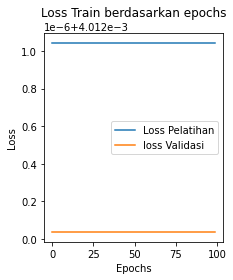

In [123]:
import matplotlib.pyplot as plt


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Loss Pelatihan')
plt.plot(history.history['val_accuracy'], label = 'loss Validasi')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Grafil Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

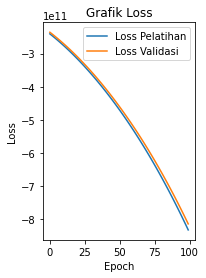

In [124]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Grafik Loss')
plt.show()